In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import tqdm
import skimage.io
import glob

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize

from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import InputLayer, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
train_dataset_0_all = glob.glob('./C-NMC_Leukemia/training_data/fold_0/all/*.bmp')
train_dataset_0_hem = glob.glob('./C-NMC_Leukemia/training_data/fold_0/hem/*.bmp')
train_dataset_1_all = glob.glob('./C-NMC_Leukemia/training_data/fold_1/all/*.bmp')
train_dataset_1_hem = glob.glob('./C-NMC_Leukemia/training_data/fold_1/hem/*.bmp')
train_dataset_2_all = glob.glob('./C-NMC_Leukemia/training_data/fold_2/all/*.bmp')
train_dataset_2_hem = glob.glob('./C-NMC_Leukemia/training_data/fold_2/hem/*.bmp')

valid_data = pd.read_csv('./C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

In [13]:
A = []
H = []

A.extend(train_dataset_0_all)
A.extend(train_dataset_1_all)
A.extend(train_dataset_2_all)

H.extend(train_dataset_0_hem)
H.extend(train_dataset_1_hem)
H.extend(train_dataset_2_hem)

In [14]:
A = np.array(A)
H = np.array(H)

In [29]:
len(A), len(H)

(7272, 3389)

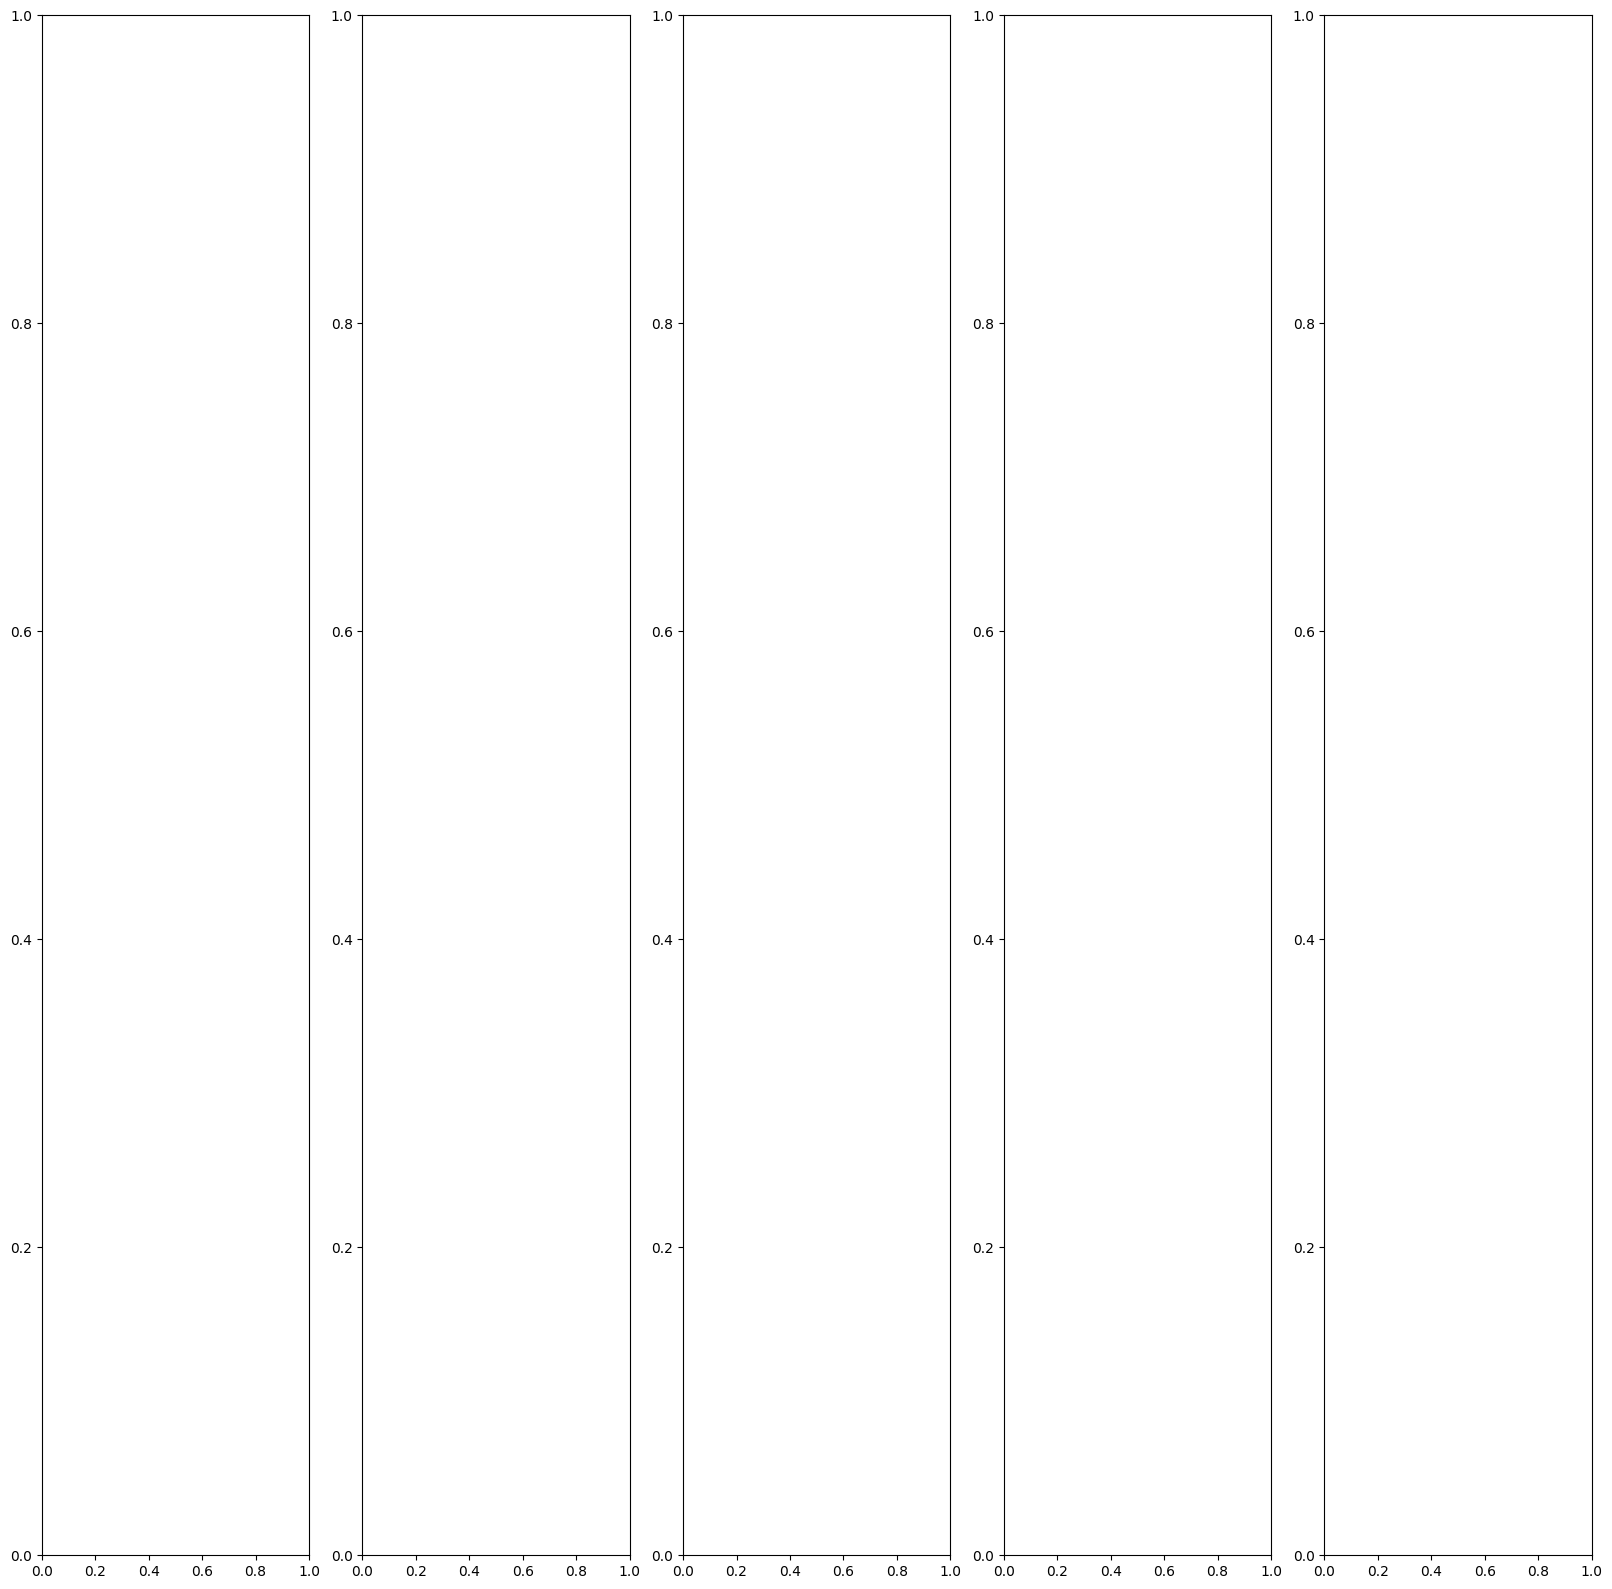

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

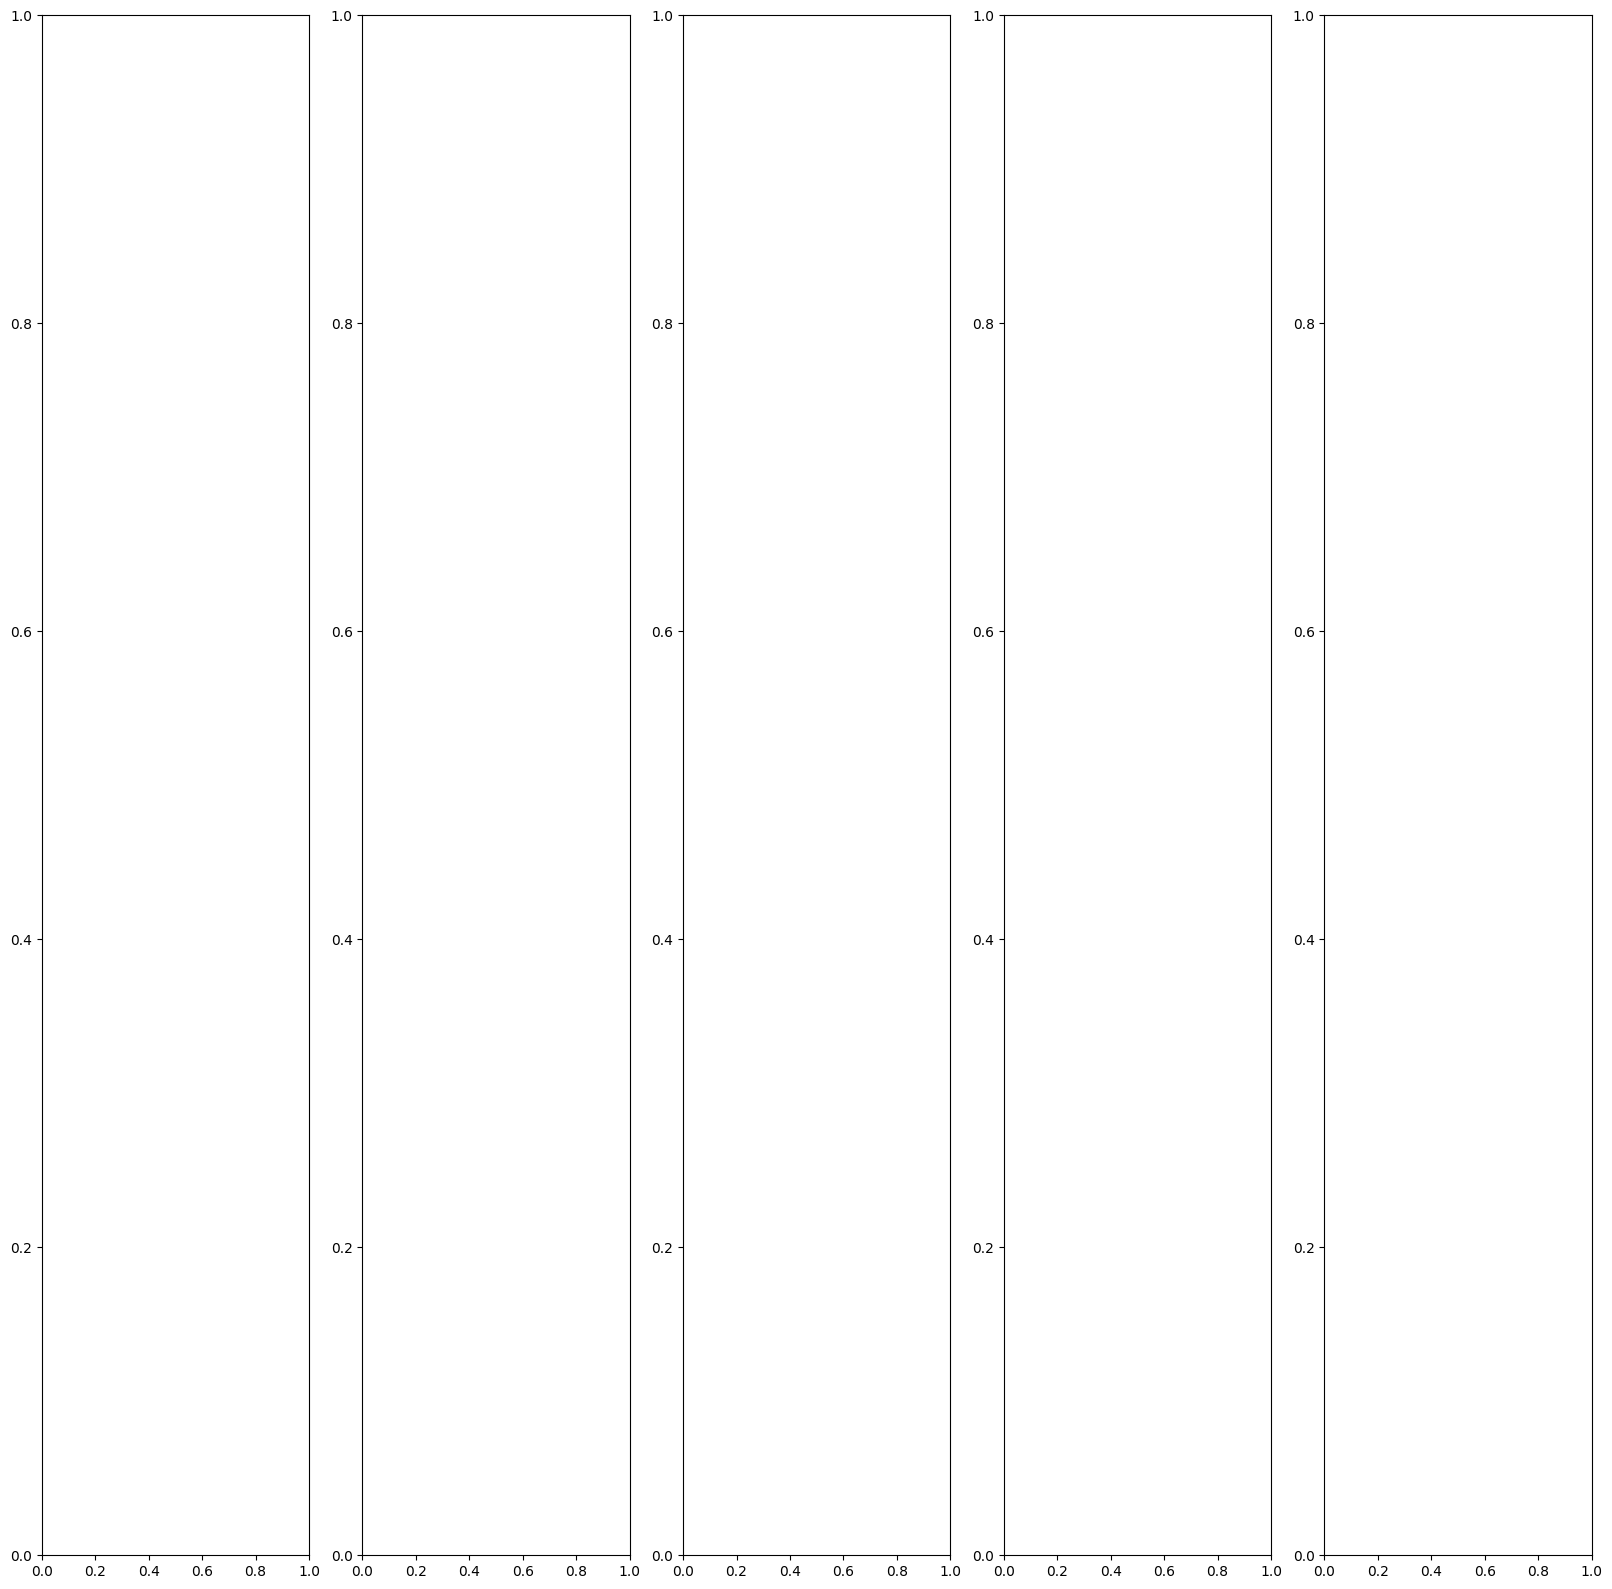

In [31]:
for i in range(5):
    rand = np.random.randint(len(A))
    img = imread(A[rand])
    img = resize(img, (128, 128))
    ax[i].imshow(img)
    ax[i].axis('off')

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))


In [32]:
for i in range(5):
    rand = np.random.randint(len(H))
    img = imread(H[rand])
    img = resize(img, (128, 128))
    ax[i].imshow(img)
    ax[i].axis('off')

In [33]:
Image = []
Label = []

for i in range(len(A)):
    img = imread(A[i])
    img = resize(img, (128, 128))
    Image.append(img)
    Label.append(1)

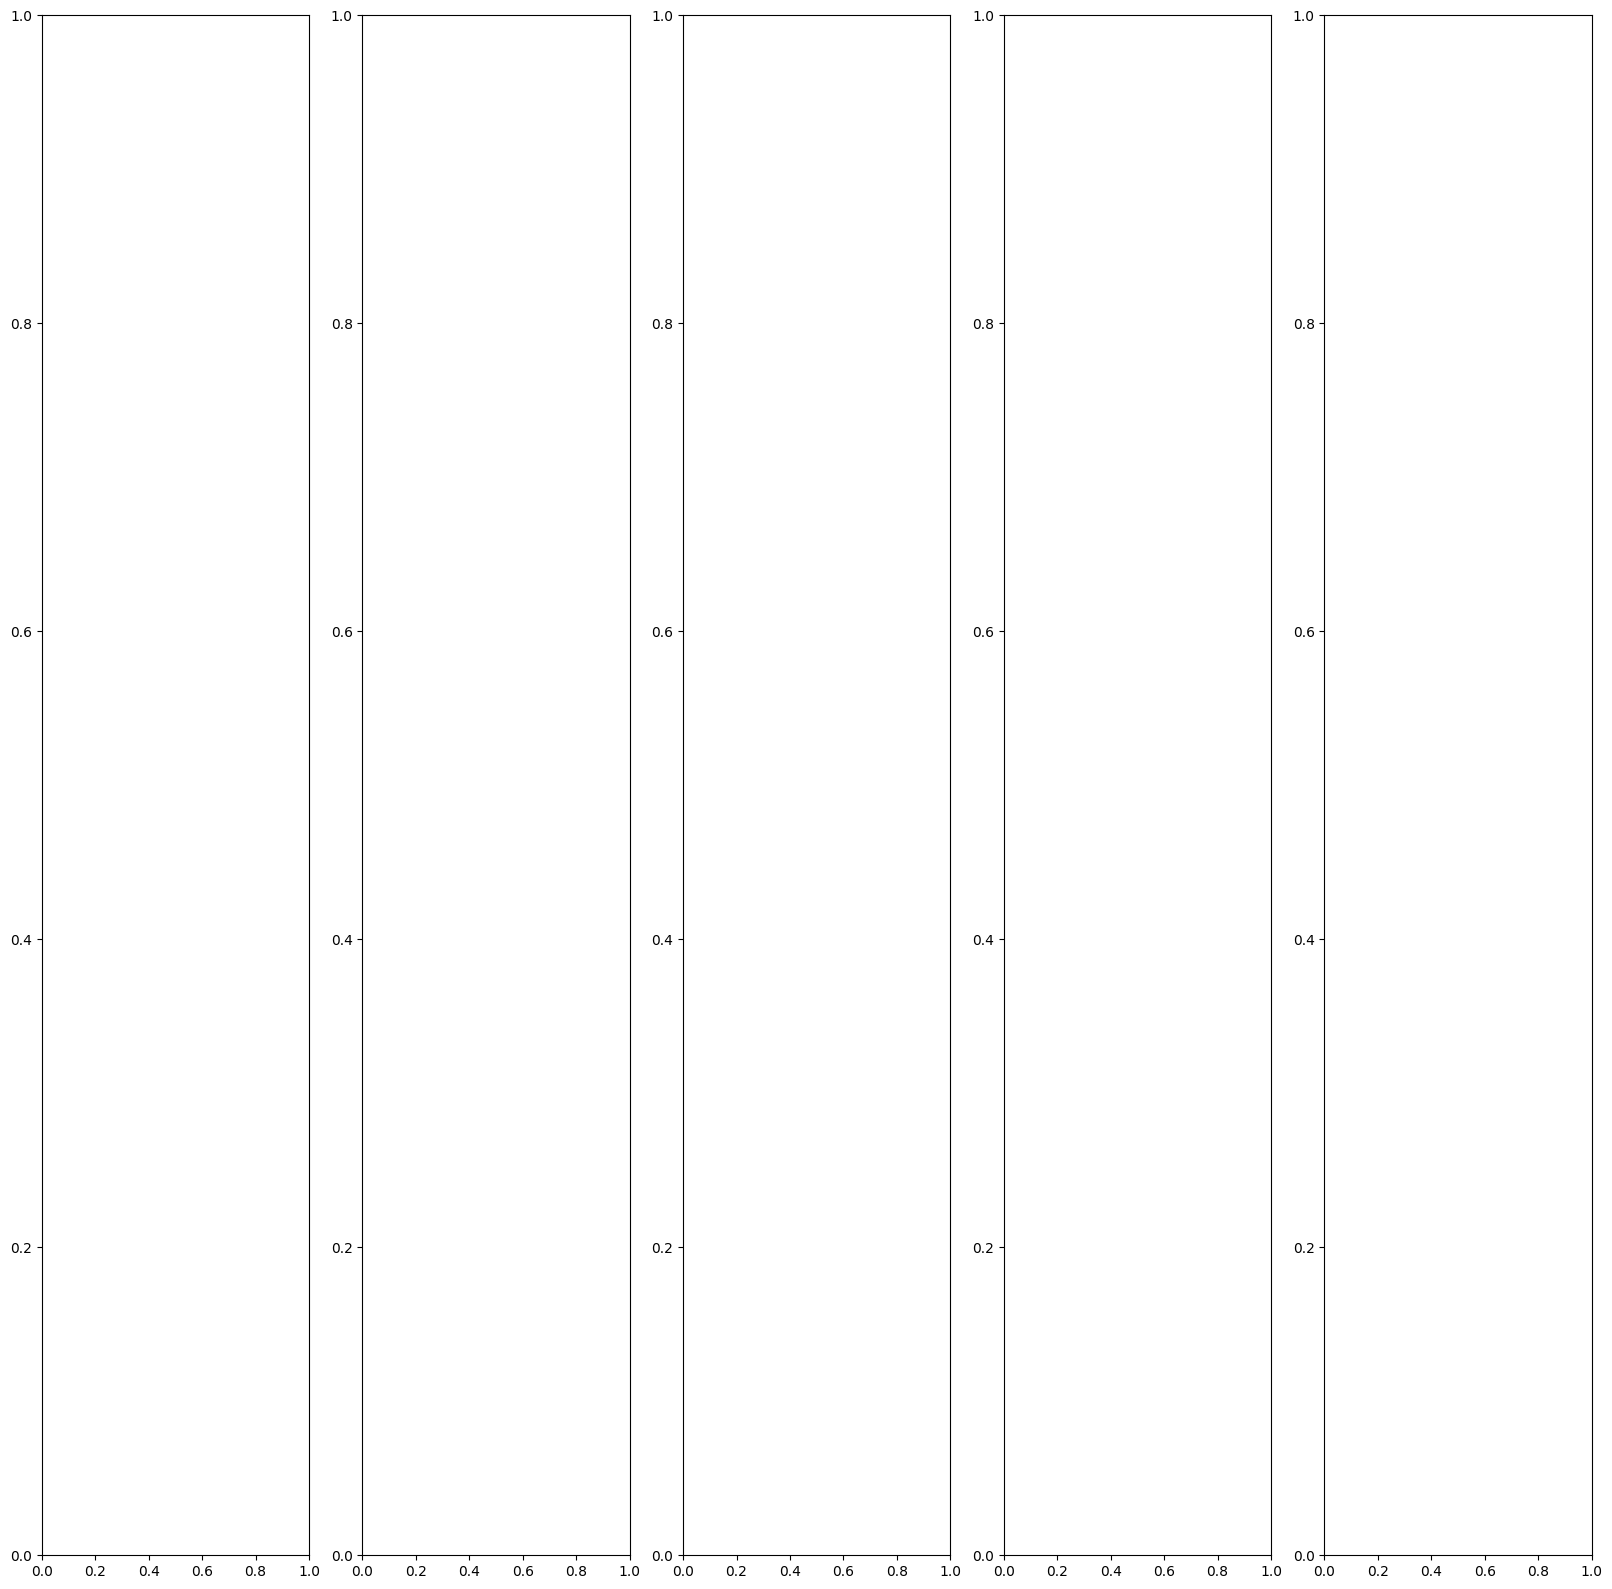

In [34]:
for i in range(len(H)):
    img = imread(H[i])
    img = resize(img, (128, 128))
    Image.append(img)
    Label.append(0)

Image = np.array(Image)
Label = np.array(Label)

Image.shape, Label.shape

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

In [35]:
for i in range(5):
    rand = np.random.randint(len(Image))
    ax[i].imshow(Image[rand])
    ax[i].axis('off')
    a = Label[rand]
    if a == 1:
        ax[i].set_title('Diseased')
    else:
        ax[i].set_title('Non_Diseased')

In [36]:
X = Image
y = Label

valid_data.labels.value_counts()

labels
1    1219
0     648
Name: count, dtype: int64

In [38]:
X_val = []

In [39]:
for image_name in valid_data.new_names:
    img = imread('./C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/' + image_name)
    img = resize(img, (128, 128))
    X_val.append(img)

X_val = np.array(X_val)

In [40]:
y_val = valid_data.labels.values

In [41]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

train_datagen.fit(X)

In [43]:
base_model = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3),
    pooling='avg',
)

In [44]:
model = Sequential()
model.add(base_model)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [48]:
epochs = 10  
history = model.fit(
    train_datagen.flow(X, y, batch_size=32),
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint],
    verbose=2,
)

Epoch 1/10


c:\Users\manav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


334/334 - 647s - loss: 0.5227 - accuracy: 0.7669 - val_loss: 87.4101 - val_accuracy: 0.6529 - 647s/epoch - 2s/step
Epoch 2/10
334/334 - 626s - loss: 0.3797 - accuracy: 0.8474 - val_loss: 23.4666 - val_accuracy: 0.3471 - 626s/epoch - 2s/step
Epoch 3/10
334/334 - 557s - loss: 0.3107 - accuracy: 0.8761 - val_loss: 87.7550 - val_accuracy: 0.3471 - 557s/epoch - 2s/step
Epoch 4/10
334/334 - 591s - loss: 0.2897 - accuracy: 0.8888 - val_loss: 152.7101 - val_accuracy: 0.3471 - 591s/epoch - 2s/step
Epoch 5/10
334/334 - 610s - loss: 0.2844 - accuracy: 0.8904 - val_loss: 443.6550 - val_accuracy: 0.3471 - 610s/epoch - 2s/step
Epoch 6/10
334/334 - 645s - loss: 0.2850 - accuracy: 0.8861 - val_loss: 10579.6504 - val_accuracy: 0.3471 - 645s/epoch - 2s/step
Epoch 7/10
334/334 - 2021s - loss: 0.3302 - accuracy: 0.8678 - val_loss: 101.2709 - val_accuracy: 0.3471 - 2021s/epoch - 6s/step


In [50]:
test_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {test_accuracy[1]:.4f}")

59/59 [==============================] - 19s 314ms/step - loss: 23.4666 - accuracy: 0.3471
Validation Accuracy: 0.3471
